## 10주차 과제_0509(금)

딥러닝 파이토치 교과서 ch2. 4 p.69~87

# 2.4 파이토치 코드 맛보기

In [46]:
!pip install --upgrade matplotlib --use-feature=2020-resolver
!pip install --upgrade seaborn --use-feature=2020-resolver
!pip install --upgrade scikit-learn --use-feature=2020-resolver


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [opti

In [47]:
# 필요한 라이브러리 호출
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
# 데이터 호출
dataset = pd.read_csv('/content/drive/MyDrive/ESAA/25-1 OB 세션/datasets/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

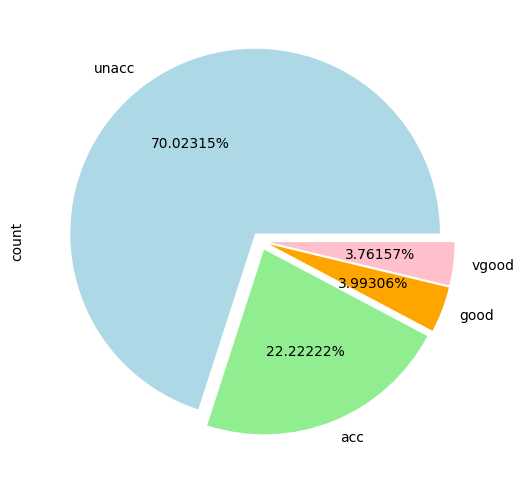

In [49]:
# 예제 데이터셋 분포
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['figure.figsize'] = fig_size
dataset.output.value_counts().plot(kind = 'pie', autopct = '%0.05f%%', colors = ['lightblue', 'lightgreen', 'orange', 'pink'], explode = (0.05, 0.05, 0.05, 0.05))

딥러닝은 단어를 숫자(텐서)로 변환해야 함

이를 위해 데이터의 형태를 파악한 후 숫자로 변환해주어야 함

In [50]:
# 데이터를 범주형 타입으로 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns :
    dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

[범주형 데이터 변환 과정]

**범주형 데이터 $\rightarrow$ dataset[category] $\rightarrow$ 넘파이 배열(NumPy array) $\rightarrow$ 텐서(Tensor)**

cat.codes를 이용하여 범주형 데이터(단어)를 숫자(넘파이 배열)로 변환

np.stack을 이용해 두 개 이상의 넘파이 객체를 합침

<note : np.stack과 np.concatenate>

두 코드 모두 넘파이 객체를 합칠 때 사용하는 메서드

- np.concatenate : 선택한 축(axis)을 기준으로 두 개의 배열을 연결

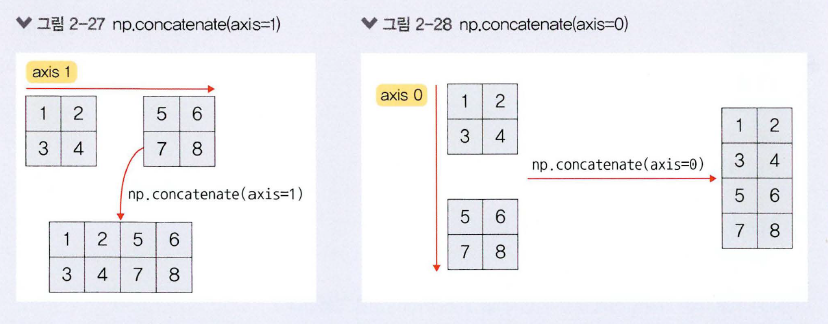

- np.stack : 배열들을 새로운 축으로 합침, 반드시 두 배열의 차원이 동일해야 함

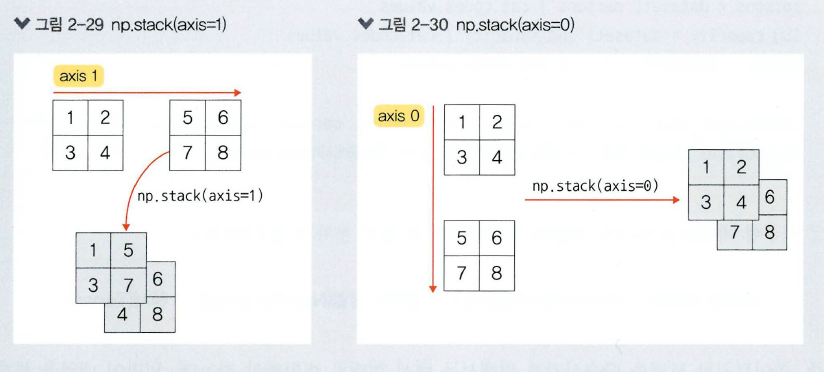

In [51]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype = torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [52]:
# 레이블로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


- get_dummies. : 가변수 만들어 주는 함수

    가변수 : 문자를 숫자 (0,1)로 바꾸는 것

In [53]:
# ex)
import pandas as pd
import numpy as np

data = {
    'gender' : ['male', 'female', 'male'],
    'weight' : [72, 55, 68],
    'nation' : ['Japan', 'Korea', 'Australia']
}

df = pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


In [54]:
# 성별과 국적을 숫자로 변환
df = pd.get_dummies(df)

df

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,False,True,False,True,False
1,55,True,False,False,False,True
2,68,False,True,True,False,False


\<note : ravel(), reshape(), faltten()>

차원을 바꿀 때 사용


```
a = np.array([[1,2],[3,4]])
print(a.ravel())
print(a.reshape(-1))
print(a.faltten())
```



워드 임베딩 : 유사한 단어끼리 유사하게 인코딩되도록 표현하는 방법

높은 차원의 임베딩일수록 단어 간의 세부적인 관계를 잘 파악할 수 있음

- 단일 숫자로 변환된 넘파이 배열을 N차원으로 변경하여 사용함

    1. 모든 범주형 칼럼에 대한 임베딩 크기(벡터 차원)를 정의

        일반적으로 칼럼의 고유 값 수를 2로 나눈 임베딩 크기를 사용

In [55]:
# 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]

categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]

print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [56]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [57]:
# 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [63]:
# 모델의 네트워크 생성
class Model(nn.Module):  ## 1
    def __init__(self, embedding_size, output_size, layers, p = 0.4):  ## 2
        super().__init__() ## 3
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols # 입력층의 크기를 찾기 위해 범주형 칼럼 개수를 input_size에 저장

        for i in layers :  ## 4
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace = True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers) # 신경망의 모든 계층이 순차적으로 실행되도록 모든 계층에 대한 목록(all_layers)을 nn.Sequential 클래스로 전달

    def forward(self, x_categorical): ### 5
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
           embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)   # 넘파이의 concatenate와 같지만 대상이 텐서
        x = self.embedding_dropout(x)
        x = self.layers(x)

        return x

\## 1

클래스 형태로 구현되는 모델은 nn.Module을 상속 받음

\## 2

\_\_init\_\_()은 모델에서 사용될 파라미터와 신경망을 초기화하기 위해 사용

객체 생성 시 자동으로 호출됨

<매개변수>
1. self : 첫 번째 파라미터, 자기 자신을 의미

2. embedding_size : 범주형 칼럼의 임베딩 크기

3. output_size : 출력층의 크기

4. layers : 모든 계층에 대한 목록

5. p : 드롭아웃, 기본값은 0.5

\## 3

super().\_\_init\_\_()은 부모 클래스(nn.Module)에 접근 시 사용

\## 4

모델의 네트워크 계층 구축을 위해 for문을 이용하여 각 계층을 all_layers 목록에 추가

<추가된 계층>
1. Linear : 선형 계층은 입력 데이터에 선형 변환을 진행한 결과

$$y = W_x+b\\
y : 선형\ 계층의\ 출력\ 값 \\
W : 가중치 \\
x : 입력\ 값 \\
b : 바이어스$$

2. ReLU : 활성화 함수로 사용

3. BatchNorm1d : 배치 정규화 용도로 사용

4. Dropout : 과적합 방지에 사용

\## 5

forward() 함수는 학습 데이터를 입력받아서 연산 진행, 모델 객체를 데이터와 함께 호출하면 자동으로 실행됨

In [64]:
# Model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p =0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [65]:
# 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [66]:
# CPU/GPU 사용 지정
if torch.cuda.is_available():
    device = torch.device('cuda') # GPU가 있다면 GPU 사용
else :
    device = torch.device('cpu') # GPU가 없다면 CPU 사용

In [67]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs): # for문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss) # 반복할 때마다 오차를 aggregated_losses에 추가

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward() # 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
    optimizer.step() # 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트


print(f'epoch: {i:3} loss: {single_loss.item():10.10f}') # 오차가 25 에포크마다 출력

epoch:   1 loss: 1.54267311
epoch:  26 loss: 1.36679244
epoch:  51 loss: 1.25770390
epoch:  76 loss: 1.15845478
epoch: 101 loss: 1.04187632
epoch: 126 loss: 0.91956258
epoch: 151 loss: 0.83467537
epoch: 176 loss: 0.74297082
epoch: 201 loss: 0.68486816
epoch: 226 loss: 0.65280509
epoch: 251 loss: 0.63078177
epoch: 276 loss: 0.62015074
epoch: 301 loss: 0.60830235
epoch: 326 loss: 0.60143769
epoch: 351 loss: 0.58399332
epoch: 376 loss: 0.58612579
epoch: 401 loss: 0.58334655
epoch: 426 loss: 0.57174546
epoch: 451 loss: 0.57187712
epoch: 476 loss: 0.56822330
epoch: 500 loss: 0.5757296085


In [68]:
# 테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device = device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.55368221


In [69]:
# 모델의 예측 확인
print(y_val[:5])

tensor([[ 2.3876,  1.1416, -3.2468, -3.1260],
        [ 1.9063,  1.0759, -2.7547, -2.6855],
        [ 1.8615,  1.0997, -2.9301, -3.2316],
        [ 2.8440,  1.4374, -3.6231, -3.6807],
        [ 2.9655,  1.5691, -3.6916, -3.7177]])


In [70]:
# 가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [71]:
# 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[256   3]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       259
           1       0.25      0.01      0.02        86

    accuracy                           0.74       345
   macro avg       0.50      0.50      0.44       345
weighted avg       0.63      0.74      0.65       345

0.744927536231884


- True Positive : 모델이 '1'이라고 예측했는데 실제 값도 '1'인 경우

- True Negative : 모델이 '0'이라고 예측했는데 실제 값도 '0'인 겨웅

- False Positive : 모델이 '1'이라고 예측했는데 실제 값은 '0'인 경우, Type 1 오류

- False Negative : 모델이 '0'이라고 예측했는데 실제 값은 '1'인 경우, Type 2 오류

**정확도**

전체 예측 건수에서 정답을 맞힌 건수의 비율

$$\frac{True\ Positive+True\ Negative}{True\ Positive+True\ Negative+False\ Positive+False\ Negative}$$

**재현율**

실제로 정답이 1이라고 할 때 모델도 1로 예측한 비율

$$\frac{True\ Positive}{True\ Positive+False\ Negative}$$

**정밀도**

모델이 1이라고 예측한 것 중에서 실제로 정답이 1인 비율

$$\frac{True\ Positive}{True\ Positive+False\ Positive}$$

**F1-스코어**

트레이드오프 : 정밀도가 높으면 재현율이 낮고, 재현율이 높으면 정밀도가 낮은 문제

트레이드오프를 해결하려고 정밀도와 재현율의 조화 평균을 이용한 것

$$2 \times \frac{Precision \times Recall}{Precision + Recall}$$